# 1. 프로젝트 목표 및 목적

T P E

- 진료내역정보(성별, 나이, 주소, 병명, 병원 수준, 입원일 등)를 통해 수진자 본인 부담금을 예측한다.

# 2. 관련 데이터 수집
- 공공데이터포털 https://data.go.kr/data/15007115/fileData.do 의 2018년 진료 내역 정보(진료내역정보(2018)_20191217.zip)

## 항목별 세부 사항

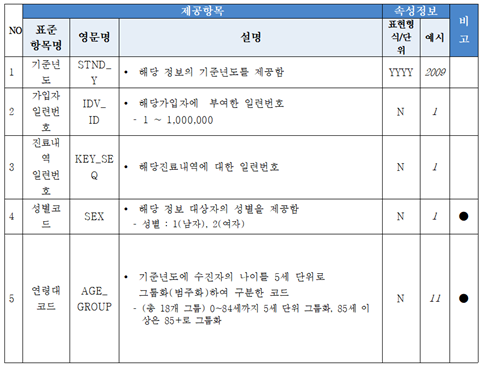

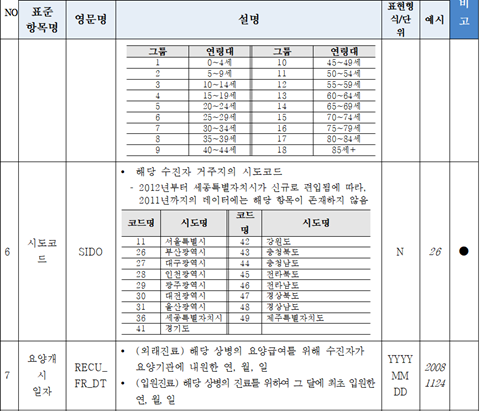

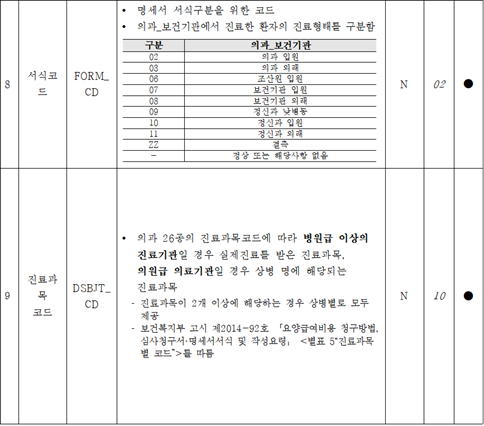

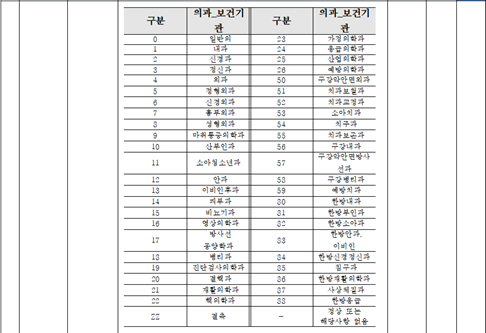

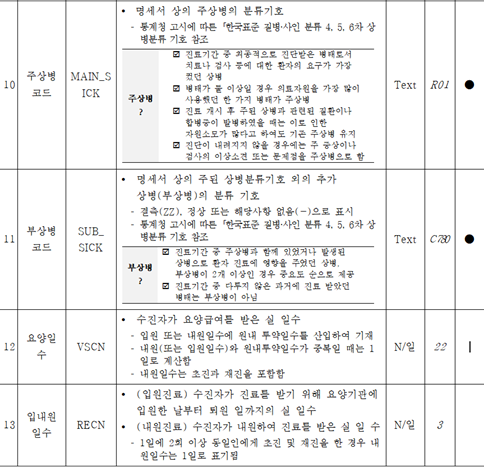

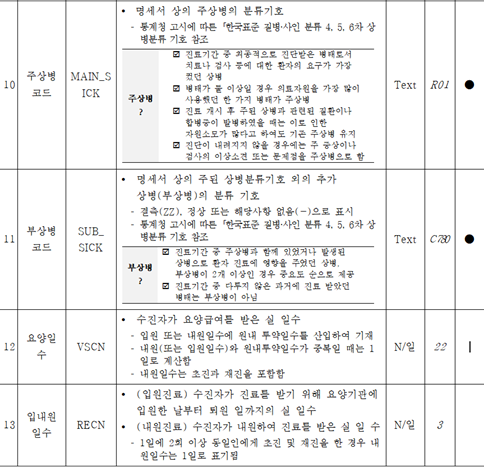

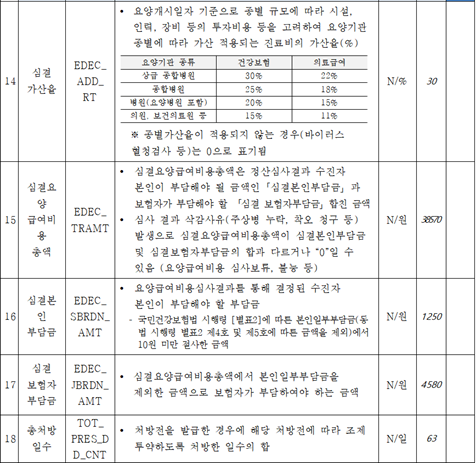

## 사용할 항목(column) 선택

1. 기준 년도 : 제거(2018)
2. 가입자 일련번호 : 제거 -> 같은 사람의 진료라도 개별적인 것으로 처리. 
3. 진료 내역일련번호 : 제거
4. 성별 코드 : **사용**
5. 연령대 코드 : **사용**
6. 시도 코드 : **사용**
7. 요양 개시일 : **미사용**(아프기 시작한 날이므로 날씨, 외부 환경 등에 연관성 있을 수 있다. but 적용 힘들어 일단 제거)
8. 서식 코드 : **사용**(*결측치 제거 필요*. 임의로 대체하기 어려움)
9. 진료 과목 코드 : **사용**(*class*로 바꿔줄 필요가 있다)
10. 주상병 코드 : **사용**(*class*로 바꿔줄 필요가 있다.)
11. 부상병 코드 : **사용**(*class*로 바꿔줄 필요가 있다.)
12. 요양일수 : **사용**
13. 입내원일수 : **사용**(요양일수와 동일하지 않은 경우도 의외로 존재하기 때문에 둘 다 사용)
14. 심결 가산율 : **사용**(상급 종합 병원(0.3), 종합 병원(0.25), 병원,요양병원(0.2), 의원, 보건의료원(0.15) 등 시설, 인력, 장비 등에 따른 결과값이 나올 것이라고 생각된다. 또한, 0.3, 0.25, 0.2, 0.15가 병원의 등급을 나누는 적절한 기준인지 알 수 없기 때문에 *class*로 바꿔줄 필요가 있다.)
15. 심결 요양 급여비용 총액 : 제거 (심결 요양 급여비용 총액 = 심결 본인 부담금 + 심결 보험자 부담금)
16. 심결 본인 부담금 : **사용**(*결과값*으로 사용)
17. 심결 보험자 부담금 : 제거
- 15, 17은 16의 결과값과 직접적으로 연관이 있기 때문에 제거한다.




18. 총 처방 일수 : **사용**
19. 데이터 기준 일자 : 제거


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 scheme 대신에 seaborn scheme, font setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings; warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터셋 가져오기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
cd /content/gdrive/MyDrive/Colab Notebooks/진료내역정보를 통한 수진자 본인 부담금 예측

/content/gdrive/MyDrive/Colab Notebooks/진료내역정보를 통한 수진자 본인 부담금 예측


In [4]:
col = ['Year', 'ID', 'Key_SEQ', 'Sex', 'Age_Group', 'SIDO', 'Recu_FR_DT', 'FORM_CD', 'DSBJT_CD',
       'Main_Sick', 'Sub_Sick', 'Days', 'RECN', 'EDEC_ADD_RT', 'EDEC_TRAMT', 'EDEC_SBRDN_AMT', 'EDEC_JBRDN_AMT', 'TOT_PRES_DD_CNT', 'dataday']

In [5]:
df = pd.read_csv('NHIS_OPEN_T20_2018_PART1.csv', names = col, encoding = 'unicode_escape')
# 메모리 부족으로 인해 3개의 파일을 모두 사용하는데 어려움이 있었다.
# 파일 1개(약 455만개 진료 기록)가 충분한 데이터 양이며, 편향이 존재하지 않는다고 판단하고 진행하였다.
# data2 = pd.read_csv('NHIS_OPEN_T20_2018_PART2.csv', names = col, encoding = 'unicode_escape')
# data3 = pd.read_csv('NHIS_OPEN_T20_2018_PART3.csv', names = col, encoding = 'unicode_escape')

## 데이터 확인 및 변경

In [6]:
df.head()

,Year,ID,Key_SEQ,Sex,Age_Group,SIDO,Recu_FR_DT,FORM_CD,DSBJT_CD,Main_Sick,Sub_Sick,Days,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,dataday
0,±âÁØ³âµµ,°¡ÀÔÀÚÀÏ·Ã¹øÈ£,Áø·á³»¿ªÀÏ·Ã¹øÈ£,¼ºº°ÄÚµå,¿¬·É´ëÄÚµå,½ÃµµÄÚµå,¿ä¾ç°³½ÃÀÏÀÚ,¼­½ÄÄÚµå,Áø·á°ú¸ñÄÚµå,ÁÖ»óº´ÄÚµå,ºÎ»óº´ÄÚµå,¿ä¾çÀÏ¼ö,ÀÔ³»¿øÀÏ¼ö,½É°á°¡»êÀ²,½É°á¿ä¾ç±Þ¿©ºñ¿ëÃÑ¾×,½É°áº»ÀÎºÎ´ã±Ý,½É°áº¸ÇèÀÚºÎ´ã±Ý,ÃÑÃ³¹æÀÏ¼ö,µ¥ÀÌÅÍ±âÁØÀÏÀÚ
1,2018,1,29474228,1,5,47,20181120,03,01,J209,K291,1,1,0.15,21010,6300,14710,3,20191217
2,2018,2,40229620,2,4,28,20180927,03,13,J42,J303,1,1,0.15,15310,4500,10810,4,20191217
3,2018,2,26253257,2,4,28,20181204,03,13,J42,J303,1,1,0.15,15310,4500,10810,4,20191217
4,2018,2,42606436,2,4,28,20180807,03,14,L238,K297,1,1,0.15,15310,4500,10810,3,20191217


In [7]:
df.tail()

,Year,ID,Key_SEQ,Sex,Age_Group,SIDO,Recu_FR_DT,FORM_CD,DSBJT_CD,Main_Sick,Sub_Sick,Days,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,dataday
4550669,2018,350000,43361358,2,12,41,20180723,3,1,M05901,M332,1,1,0.3,55480,5500,49980,102,20191217
4550670,2018,350000,24111380,2,12,41,20181101,3,1,M05901,M332,1,1,0.3,55400,5500,49900,105,20191217
4550671,2018,350000,22899662,2,12,41,20181113,2,24,A099,K297,1,1,0.25,170030,34000,136030,2,20191217
4550672,2018,350000,60142329,2,12,41,20180416,3,1,M05901,M332,1,1,0.3,116440,11600,104840,100,20191217
4550673,2018,350000,7494484,2,12,41,20180312,3,6,M4806,M4316,1,1,0.3,39690,29600,10090,0,20191217


In [8]:
df = df.drop([0])

In [9]:
df

,Year,ID,Key_SEQ,Sex,Age_Group,SIDO,Recu_FR_DT,FORM_CD,DSBJT_CD,Main_Sick,Sub_Sick,Days,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,dataday
1,2018,1,29474228,1,5,47,20181120,03,01,J209,K291,1,1,0.15,21010,6300,14710,3,20191217
2,2018,2,40229620,2,4,28,20180927,03,13,J42,J303,1,1,0.15,15310,4500,10810,4,20191217
3,2018,2,26253257,2,4,28,20181204,03,13,J42,J303,1,1,0.15,15310,4500,10810,4,20191217
4,2018,2,42606436,2,4,28,20180807,03,14,L238,K297,1,1,0.15,15310,4500,10810,3,20191217
5,2018,2,31225816,2,4,28,20181002,03,13,J42,J303,1,1,0.15,10950,3200,7750,5,20191217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550669,2018,350000,43361358,2,12,41,20180723,3,1,M05901,M332,1,1,0.3,55480,5500,49980,102,20191217
4550670,2018,350000,24111380,2,12,41,20181101,3,1,M05901,M332,1,1,0.3,55400,5500,49900,105,20191217
4550671,2018,350000,22899662,2,12,41,20181113,2,24,A099,K297,1,1,0.25,170030,34000,136030,2,20191217
4550672,2018,350000,60142329,2,12,41,20180416,3,1,M05901,M332,1,1,0.3,116440,11600,104840,100,20191217


In [10]:
# 사용하지 않을 요소 삭제
# df.drop(['Year', 'ID', 'Key_SEQ', 'EDEC_TRAMT', 'EDEC_JBRDN_AMT', 'dataday'], axis = 1, inplace = True)
df.drop(['Year', 'ID', 'Key_SEQ', 'Recu_FR_DT', 'EDEC_TRAMT', 'EDEC_JBRDN_AMT', 'dataday'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550673 entries, 1 to 4550673
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Sex              object
 1   Age_Group        object
 2   SIDO             object
 3   FORM_CD          object
 4   DSBJT_CD         object
 5   Main_Sick        object
 6   Sub_Sick         object
 7   Days             object
 8   RECN             object
 9   EDEC_ADD_RT      object
 10  EDEC_SBRDN_AMT   object
 11  TOT_PRES_DD_CNT  object
dtypes: object(12)
memory usage: 451.3+ MB


In [ ]:
# 숫자가 크고 작음에 영향이 있는 것처럼 되지 않기 위해 one-hot encoding
# Main_Sick, Sub_Sick의 질병 정보의 경우에는 데이터가 너무 늘어날텐데 학습에 문제가 없을까?
# 1. feature 개수가 늘어나는 것때문에 데이터가 부족할 것이라고 생각되어 제거
# 2. 데이터를 저장하는 과정을 알지 못하기 때문에 편향을 방지하기 위하여 무작위로 뽑는다.


In [12]:
# df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].astype('int')
# df['Age_Group'] = df['Age_Group'].astype('category') 
df['Age_Group'] = df['Age_Group'].astype('int') 

df['SIDO'] = df['SIDO'].astype('category')
# df['Recu_FR_DT'] = pd.to_datetime(df['Recu_FR_DT'], format='%Y%m%d', errors='coerce')
df['FORM_CD'] = df['FORM_CD'].astype('category') 
df['DSBJT_CD'] = df['DSBJT_CD'].astype('category')
df['Main_Sick'] = df['Main_Sick'].astype('category')
df['Sub_Sick'] = df['Sub_Sick'].astype('category')
df['Days'] = df['Days'].astype('int')
df['RECN'] = df['RECN'].astype('int')
df['EDEC_ADD_RT'] = df['EDEC_ADD_RT'].astype('category')
df['EDEC_SBRDN_AMT'] = df['EDEC_SBRDN_AMT'].astype('int')
df['TOT_PRES_DD_CNT'] = df['EDEC_SBRDN_AMT'].astype('int')

In [13]:
# 서식 코드('FORM_CD')의 결측치 'ZZ'는 보건기관을 임의로 정해서 대체하기 어려우며, 해당하는 데이터 외에도 정보가 많다고 판단하여 제거
need_del = df[df['FORM_CD'] == 'ZZ'].index
df = df.drop(need_del)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550673 entries, 1 to 4550673
Data columns (total 12 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Sex              category
 1   Age_Group        category
 2   SIDO             category
 3   FORM_CD          category
 4   DSBJT_CD         category
 5   Main_Sick        category
 6   Sub_Sick         category
 7   Days             int64   
 8   RECN             int64   
 9   EDEC_ADD_RT      category
 10  EDEC_SBRDN_AMT   int64   
 11  TOT_PRES_DD_CNT  int64   
dtypes: category(8), int64(4)
memory usage: 377.7 MB


In [15]:
df.describe()

,Days,RECN,EDEC_SBRDN_AMT,TOT_PRES_DD_CNT
count,4.550673e+06,4.550673e+06,4.550673e+06,4.550673e+06
mean,1.210228e+00,1.870010e+00,1.735033e+04,1.735033e+04
std,2.188329e+00,5.479635e+00,8.712407e+04,8.712407e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,2.900000e+03,2.900000e+03
50%,1.000000e+00,1.000000e+00,4.500000e+03,4.500000e+03
75%,1.000000e+00,1.000000e+00,8.900000e+03,8.900000e+03
max,3.650000e+02,5.420000e+02,2.032861e+07,2.032861e+07


# 3. 데이터 전처리

# 4. 머신러닝을 위한 데이터 전처리

In [16]:
# Train/Test split
from sklearn.model_selection import train_test_split
# 본인 부담금 : cost
cost = df['EDEC_SBRDN_AMT']
df.drop('EDEC_SBRDN_AMT', axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550673 entries, 1 to 4550673
Data columns (total 11 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Sex              category
 1   Age_Group        category
 2   SIDO             category
 3   FORM_CD          category
 4   DSBJT_CD         category
 5   Main_Sick        category
 6   Sub_Sick         category
 7   Days             int64   
 8   RECN             int64   
 9   EDEC_ADD_RT      category
 10  TOT_PRES_DD_CNT  int64   
dtypes: category(8), int64(3)
memory usage: 343.0 MB


In [19]:
# Train에 필요한 Data가 충분하다고 판단하여 95 : 5로 나누었다. 이후에 Train/Test 조정해서 성능 향상을 도모할 수도 있다.
X_train, X_test, y_train, y_test = train_test_split(df, cost, test_size = 0.05, random_state = 42)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4323139, 11) (227534, 11) (4323139,) (227534,)


# 5. 학습

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

ValueError: ignored

# 6. 평가 및 튜닝